In [1]:
%run utils
import utils

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from skimage import io
from tqdm import trange, tqdm
import seaborn as sns
import geopandas
import os
import json

In [3]:
training_both = "data/splits/training_set_naip_nlcd_both.csv"
training_both_df = pd.read_csv(training_both)
image_number = 3716
image_output_path = "plots/"

NLCD_2013_img = utils.read_nlcd_img_as_np(training_both_df, image_number, 2013)
NLCD_2016_img = utils.read_nlcd_img_as_np(training_both_df, image_number, 2016)
highres_2013_img = np.load('data/2013/image_gray-3716_2013.npy')
highres_2017_img = np.load('data/2016/image_gray-3716_2016.npy')

CLASSES = ["Water", "Tree Canopy", "Low Vegetation", "Impervious"]
nlcd_map = utils.create_direct_map()
highres_map = {
    0: "Water",
    1: "Tree Canopy",
    2: "Low Vegetation",
    3: "Impervious"
}

In [4]:
%%time
nlcd_dist_2013 = utils.get_dist(NLCD_2013_img, nlcd_map, CLASSES)
nlcd_dist_2016 = utils.get_dist(NLCD_2016_img, nlcd_map, CLASSES)
nlcd_dist_2013_diff = utils.get_dist_diffpixel(NLCD_2013_img, NLCD_2016_img, nlcd_map, CLASSES)

highres_dist_2013 = utils.get_dist(highres_2013_img, highres_map, CLASSES)
highres_dist_2017 = utils.get_dist(highres_2017_img, highres_map, CLASSES)
highres_dist_2013_diff = utils.get_dist_diffpixel(highres_2013_img, highres_2017_img, highres_map, CLASSES)

CPU times: total: 2.14 s
Wall time: 2.43 s


In [5]:
%%time
nlcd_dist_change = utils.find_dist_change(NLCD_2013_img, NLCD_2016_img, nlcd_map, CLASSES)
nlcd_dist_change_diff = utils.find_dist_change_restricted(NLCD_2013_img, NLCD_2016_img, nlcd_map, CLASSES)

CPU times: total: 4.67 s
Wall time: 5.45 s


In [6]:
%time
highres_dist_change = utils.find_dist_change(highres_2013_img, highres_2017_img, highres_map, CLASSES)
highres_dist_change_diff = utils.find_dist_change_restricted(highres_2013_img, highres_2017_img, highres_map, CLASSES)

CPU times: total: 0 ns
Wall time: 0 ns


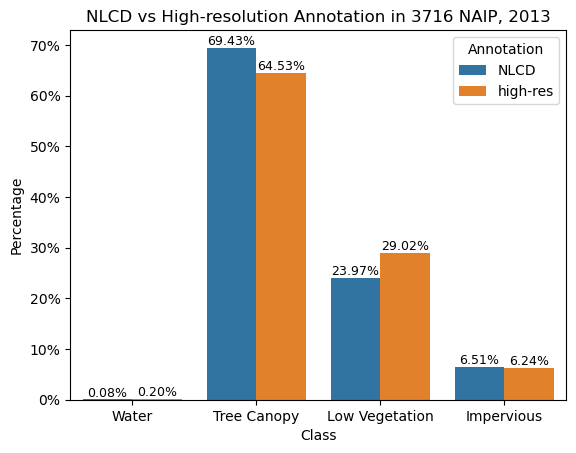

In [7]:
utils.plot_bars(nlcd_dist_2013, highres_dist_2013, 
                ["NLCD", "high-res"], 
                title="NLCD vs High-resolution Annotation in 3716 NAIP, 2013",
                output_path="plots2/NLCD vs High-resolution Annotation in 3716 NAIP - 2013.png")

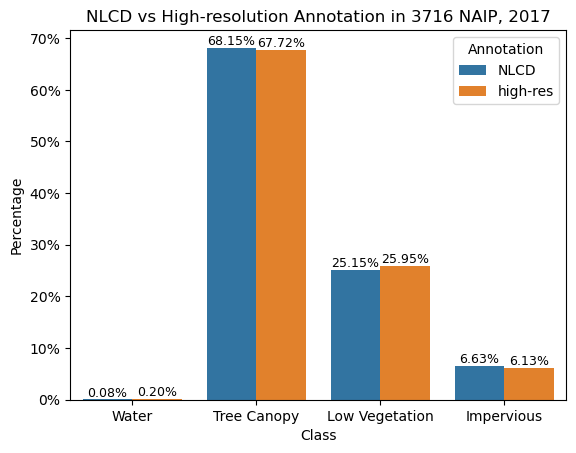

In [8]:
utils.plot_bars(nlcd_dist_2016, highres_dist_2017, 
                ["NLCD", "high-res"],
                title="NLCD vs High-resolution Annotation in 3716 NAIP, 2017",
                output_path="plots2/NLCD vs High-resolution Annotation in 3716 NAIP - 2017.png")

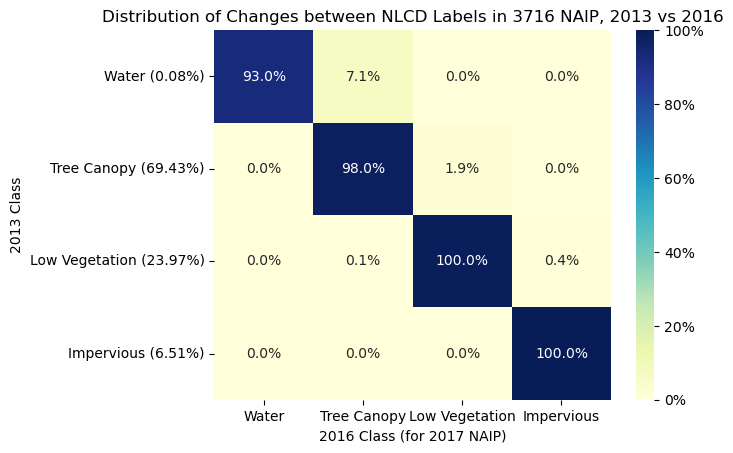

In [9]:
utils.plot_heatmaps(nlcd_dist_2013, nlcd_dist_change, 
                    title="Distribution of Changes between NLCD Labels in 3716 NAIP, 2013 vs 2016",
                    classes=CLASSES,
                    xlabel="2016 Class (for 2017 NAIP)",
                    ylabel="2013 Class", 
                    figname="plots2/Distribution of Changes between NLCD Labels in 3716 NAIP, 2013 vs 2016.png")

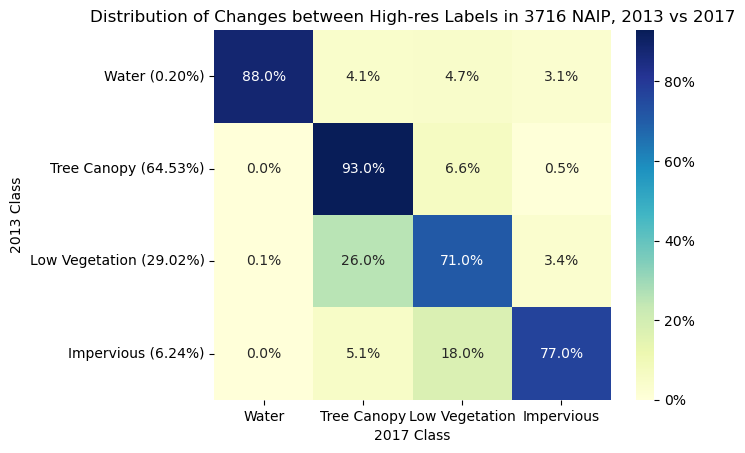

In [10]:
utils.plot_heatmaps(highres_dist_2013, highres_dist_change, 
                    title="Distribution of Changes between High-res Labels in 3716 NAIP, 2013 vs 2017",
                    classes=CLASSES,
                    xlabel="2017 Class",
                    ylabel="2013 Class", 
                    figname="plots2/Distribution of Changes between High-res Labels in 3716 NAIP, 2013 vs 2017.png")

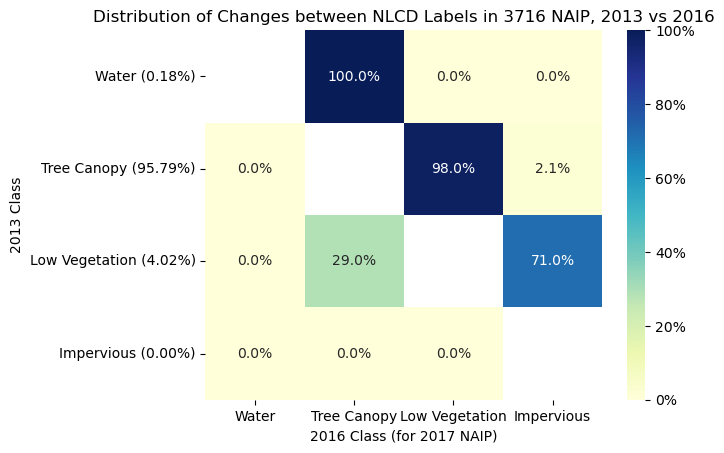

In [11]:
utils.plot_heatmaps_no_diagonal(nlcd_dist_2013_diff, nlcd_dist_change_diff,
                                title="Distribution of Changes between NLCD Labels in 3716 NAIP, 2013 vs 2016",
                                classes=CLASSES,
                                xlabel="2016 Class (for 2017 NAIP)",
                                ylabel="2013 Class",
                                figname="plots/Distribution of Changes between NLCD Labels in 3716 NAIP, 2013 vs 2016 (2).png")

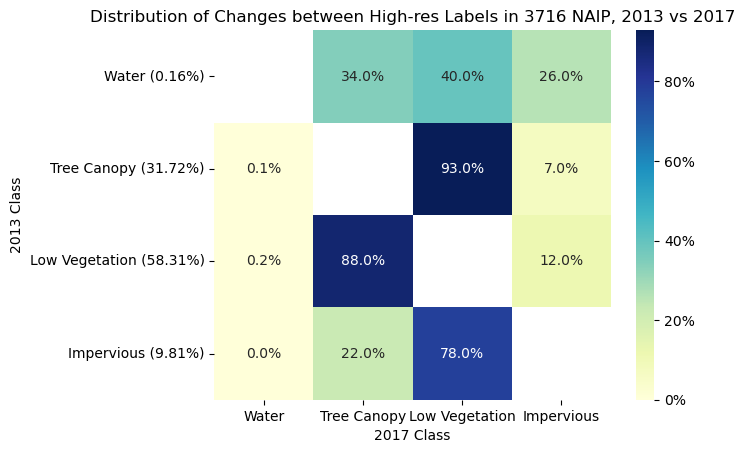

In [12]:
utils.plot_heatmaps_no_diagonal(highres_dist_2013_diff, highres_dist_change_diff,
                                title="Distribution of Changes between High-res Labels in 3716 NAIP, 2013 vs 2017",
                                classes=CLASSES,
                                xlabel="2017 Class",
                                ylabel="2013 Class",
                                figname="plots/Distribution of Changes between NLCD Labels in 3716 NAIP, 2013 vs 2017 (2).png")